<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Подготовка-и-обработка-данных" data-toc-modified-id="Подготовка-и-обработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка и обработка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек,-чтение-данных" data-toc-modified-id="Импорт-библиотек,-чтение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт библиотек, чтение данных</a></span></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Объявление-функций" data-toc-modified-id="Объявление-функций-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Объявление функций</a></span></li><li><span><a href="#Исследование-временного-ряда,-трендов,-сезонности" data-toc-modified-id="Исследование-временного-ряда,-трендов,-сезонности-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследование временного ряда, трендов, сезонности</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Объявление-констант-и-функций" data-toc-modified-id="Объявление-констант-и-функций-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Объявление констант и функций</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

## Введение

**Описание задачи:**  
Компания собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно построить модель, которая будет прогнозировать количество заказов такси на следующий час.  

**Цели исследования:**  
Необходимо построить модель машинного обучения, которая будет прогнозировать количество заказов такси на следующий час, чтобы привлекать больше водителей в период пиковой нагрузки:  
- Целевой признак - количество заказов.
- Метрикой выступает `RMSE`, её значение не должно быть ниже 48.
- Размер тестовой выборки - 10% от всего датасета.
- Данные должны быть ремемлированы по одному часу.

**Ход исследования:**
1. Подготовка данных, их ресемплирование.
2. Исследовательский анализ данных.
3. Обучение моделей.
4. Тестирование моделей, проверка на адекватность.

## Подготовка и обработка данных

### Импорт библиотек, чтение данных

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import warnings

from skimpy import skim
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.base import clone
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

sns.set(style='darkgrid')
warnings.filterwarnings('ignore')

In [42]:
df_raw = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])

В датасете нет пропущенных значений, данные уже приведены к нужному типу.

In [43]:
skim(df_raw)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 26496  │ │ int32       │ 1     │                                                          │
│ │ Number of columns │ 1      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ num_orders          │     0 │        0 │       14 │    9.2 │     0 │      8 │     19 │     120 │    █▂     │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Обработка данных

Так как необходимо разработать модель для прогнозирования на следующий час, ресемплирую данные по этому промежутку времени.

In [44]:
df_h = df_raw.resample('1H').sum().sort_index()
print('Индекс монотонно возрастает:', df_h.index.is_monotonic)
df_h.head()

Индекс монотонно возрастает: True


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


## Анализ данных

### Объявление функций

Функция `draw_base_plot` отрисовывает 4 графика:
- Временной ряд с его средним и стандартным отклонением
- Тренд пременного ряда
- Сезонность
- Остатки, шум

In [45]:
def draw_base_plot(feature, num=200, shift_size=0, fill=0, set_title='Time Series'):
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(set_title, fontsize=20)
    
    if (shift_size != 0):
        feature = feature - feature.shift(shift_size, fill_value=fill)
    feature_dec = seasonal_decompose(feature)
    
    
    data_plot = [
        pd.concat(
            [feature,
             feature.rolling(num).mean(),
             feature.rolling(num).std()],
            axis=1,
            keys=['feature', 'mean', 'std']
        ),
        feature_dec.resid,
        feature_dec.seasonal,
        feature_dec.trend
    ]
    
    data_names = ['Base plot', 'Residuals', 'Season', 'Trend']
    
    
    for i in range(0, 4):
        ax = axes[i // 2][i % 2]
        sns.lineplot(data=data_plot[i],
                 ax=ax,
                 alpha=0.8)
    
        ax.set_title(data_names[i])
        ax.set_ylabel('value')
    
    
    plt.tight_layout()
    plt.show()

### Исследование временного ряда, трендов, сезонности

В данных наблюдается увеличение среднего значения и отклонения, значения по графику тренда также увеличиваются. Ряд нестационарный, посмотрим на разность этого ряда с предыдущим значением.

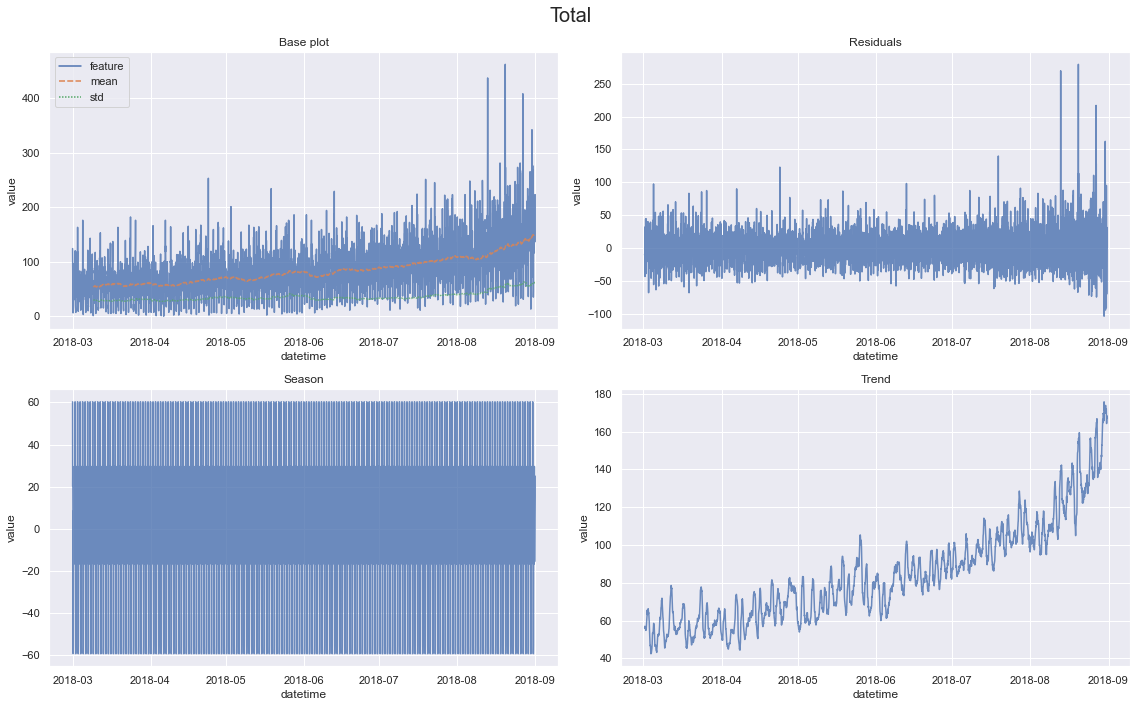

In [46]:
draw_base_plot(df_h['num_orders'], set_title='Total')

Можно заметить, что со временем увеличивается разброс значений (отклонение) у временного ряда и графика тренда, среднее остается прежним. При таком большом количестве данных тяжело проанализировать сезонность, уменьшим количество наблюдений.

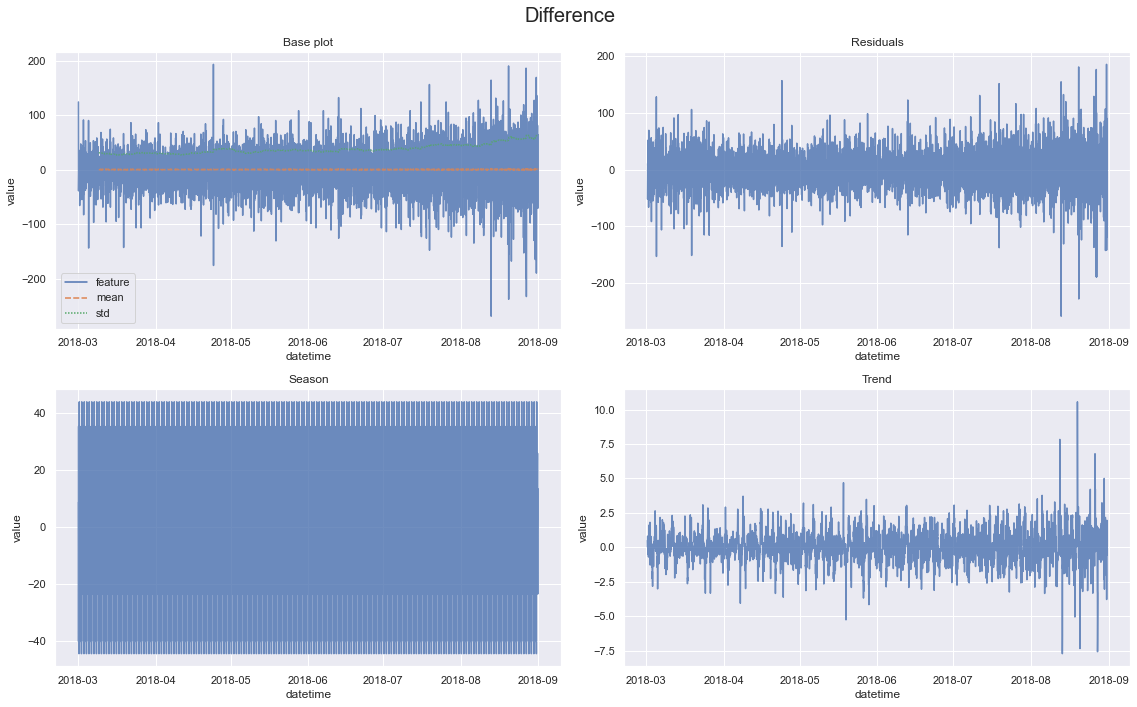

In [47]:
draw_base_plot(df_h['num_orders'], shift_size=1, set_title='Difference')

График сезонности повторяется с интервалом в 1 день, проверим изменения в течение 2 дней.

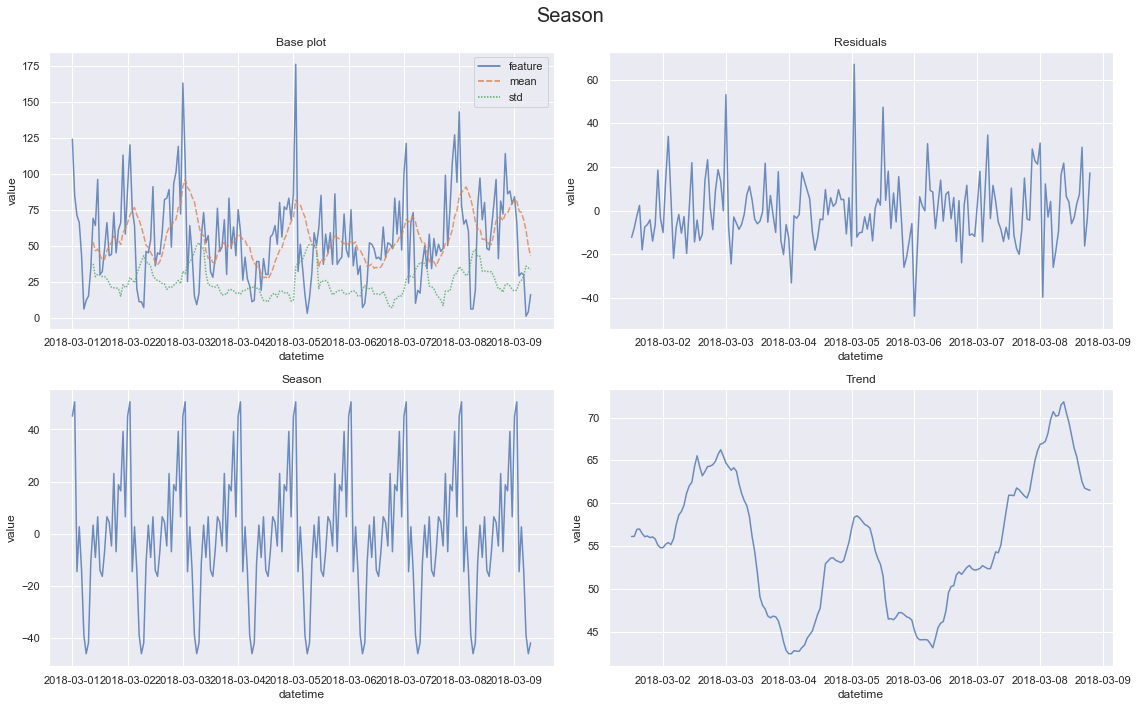

In [48]:
draw_base_plot(df_h['num_orders'].head(200), 10, set_title='Season')

Дополнительно проверим сезонность в середине каждого месяца, тренды времен года

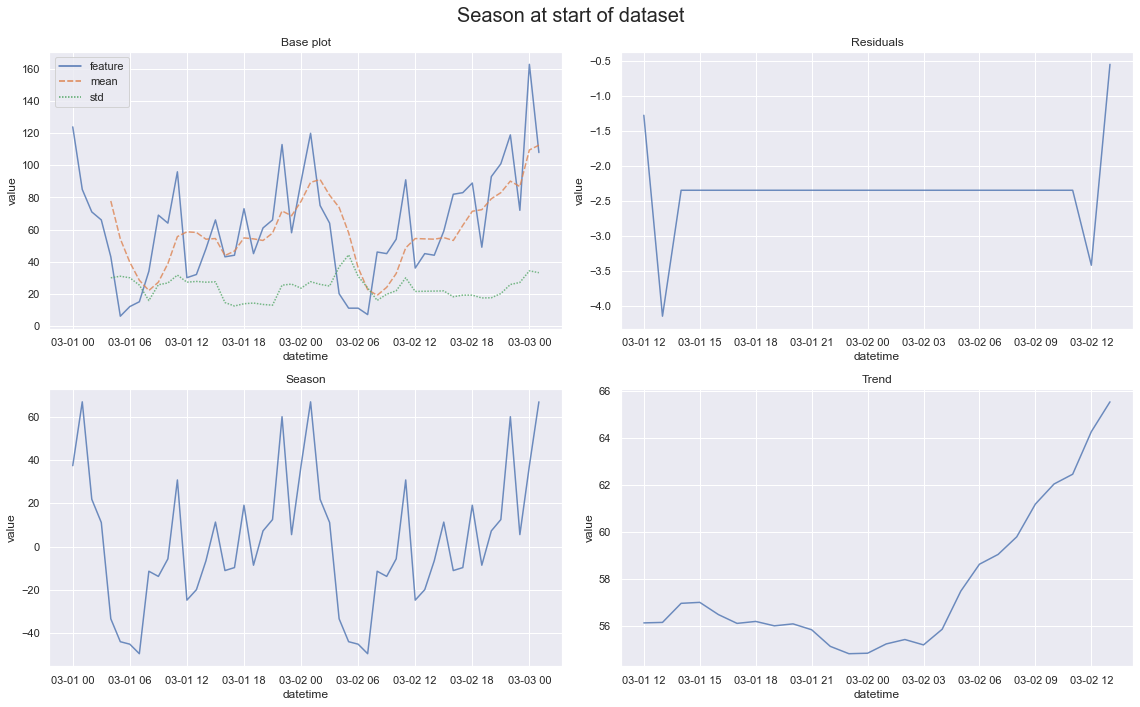

In [49]:
draw_base_plot(df_h['num_orders'].head(50), 5, set_title='Season at start of dataset')

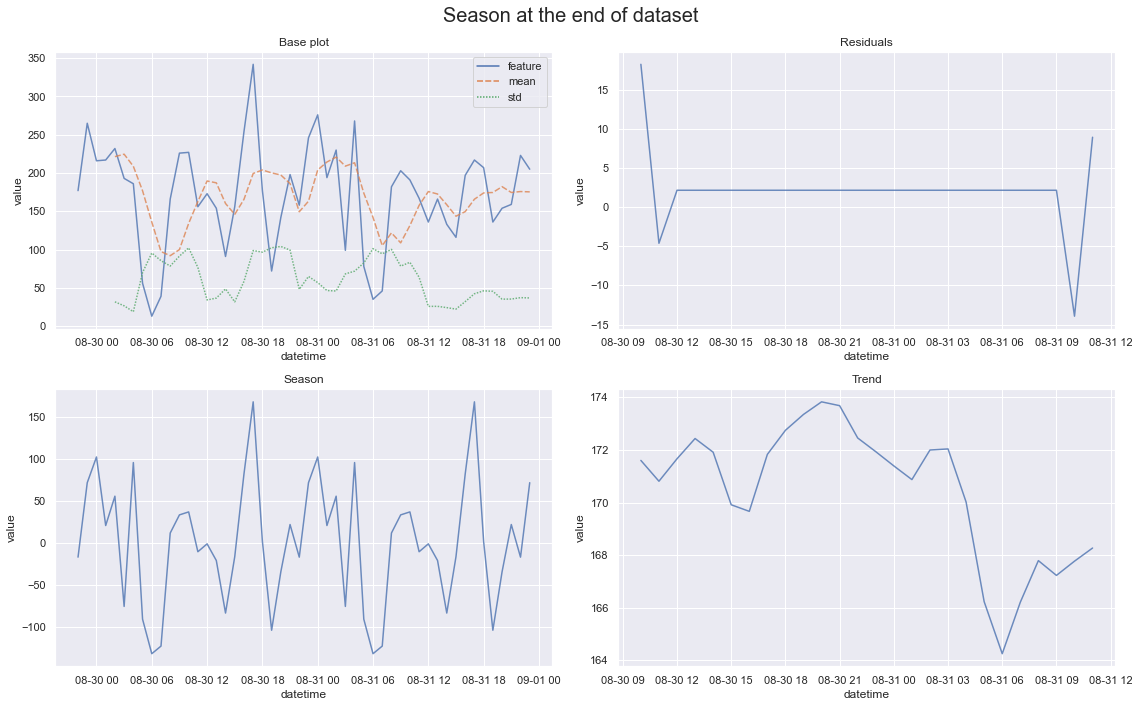

In [50]:
draw_base_plot(df_h['num_orders'].tail(50), 5, set_title='Season at the end of dataset')

Наблюдается увеличение значений на графиках тренда, скорее всего зимой меньше всего заказов.

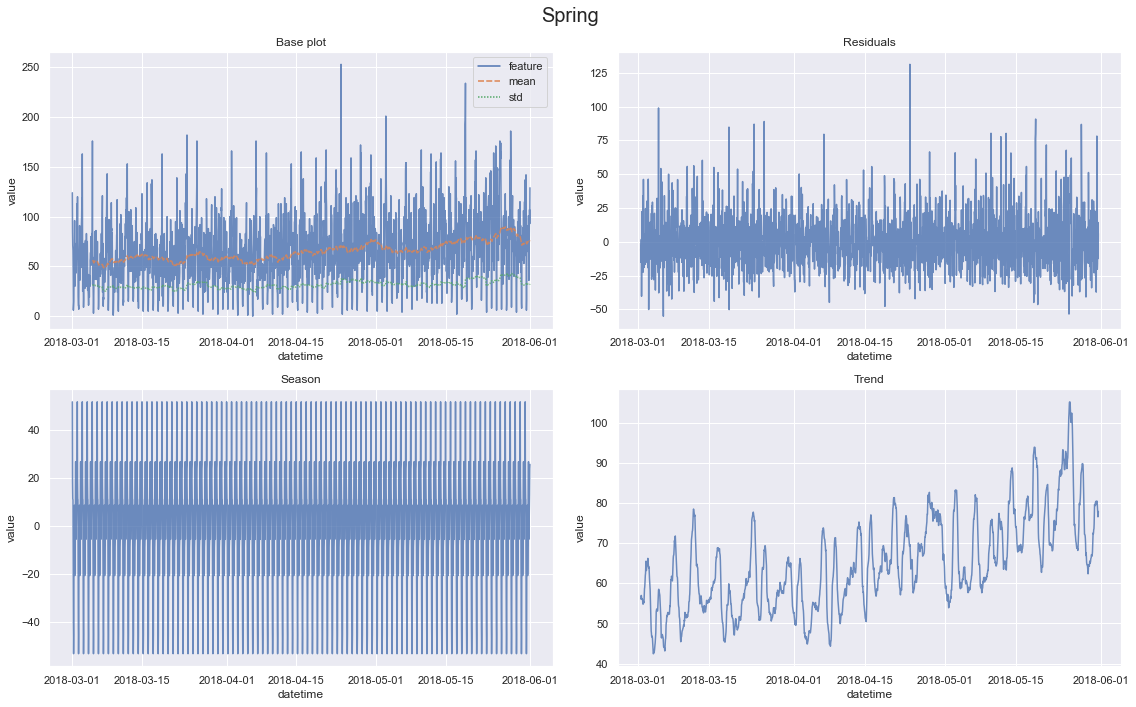

In [51]:
draw_base_plot(df_h['num_orders']['2018-03':'2018-05'], 100, set_title='Spring')

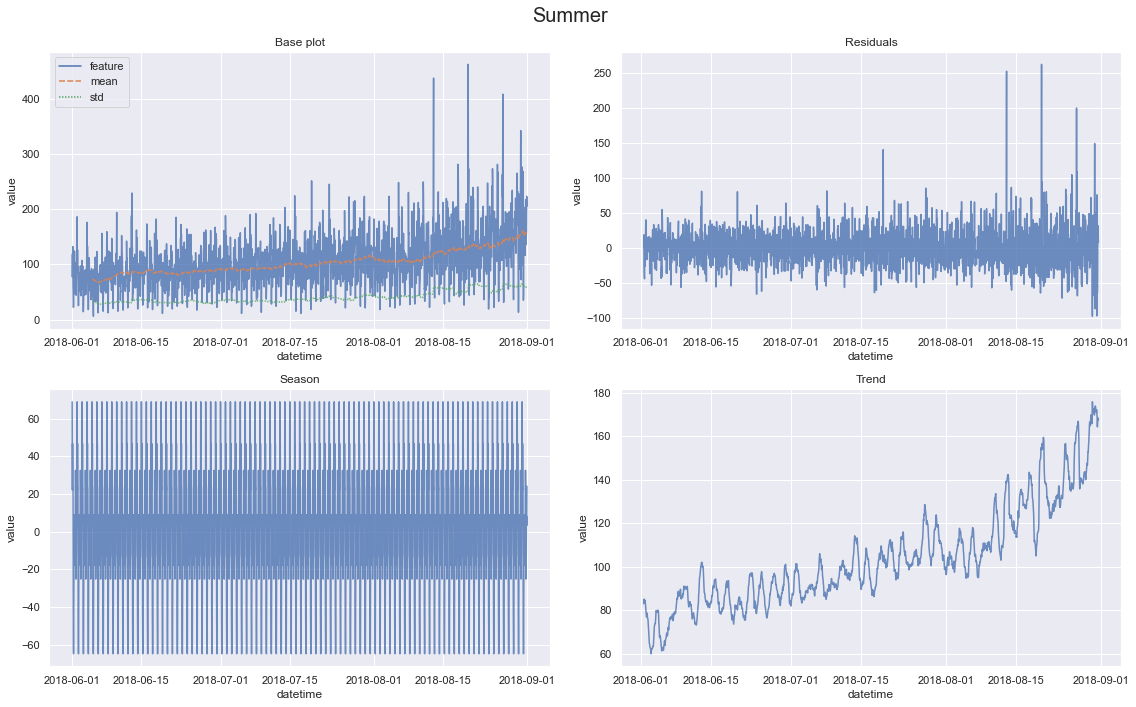

In [52]:
draw_base_plot(df_h['num_orders']['2018-06':'2018-08'], 100, set_title='Summer')

В каждом рассмотренном месяце в 6 часов меньше всего заказов. Больше всего заказов в 12 часов ночи, в мае смещается на 11 часов ночи, в июне 2 часа ночи.

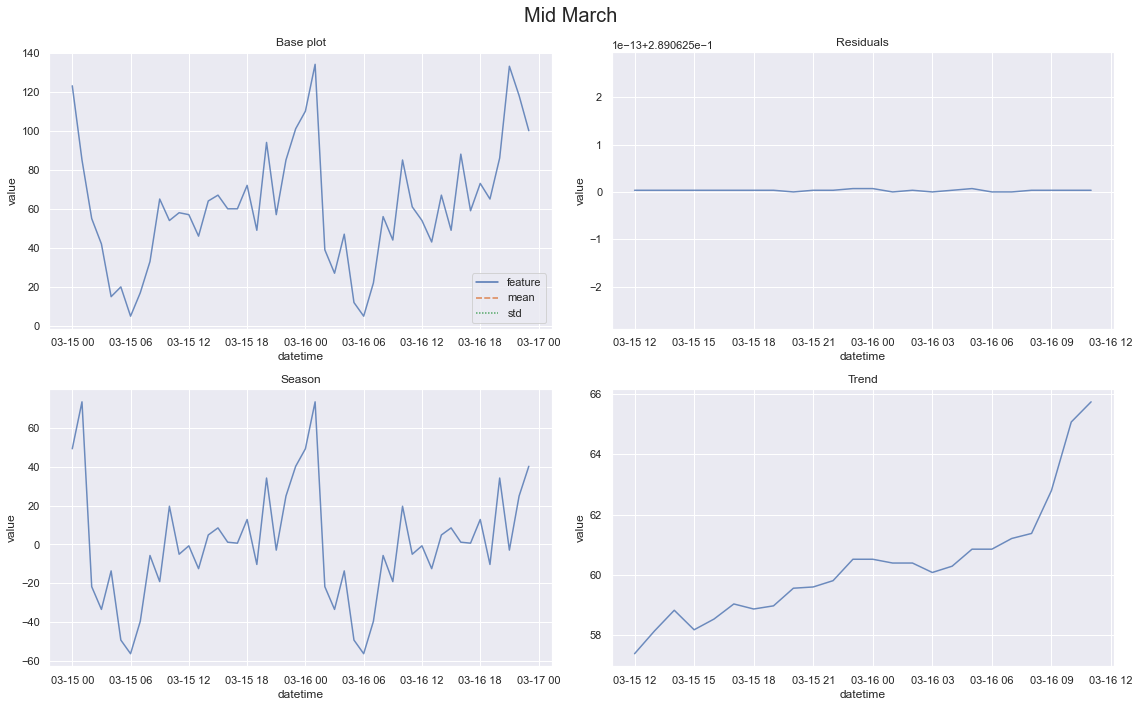

In [53]:
draw_base_plot(df_h['num_orders']['2018-03-15':'2018-03-16'], 100, set_title='Mid March')

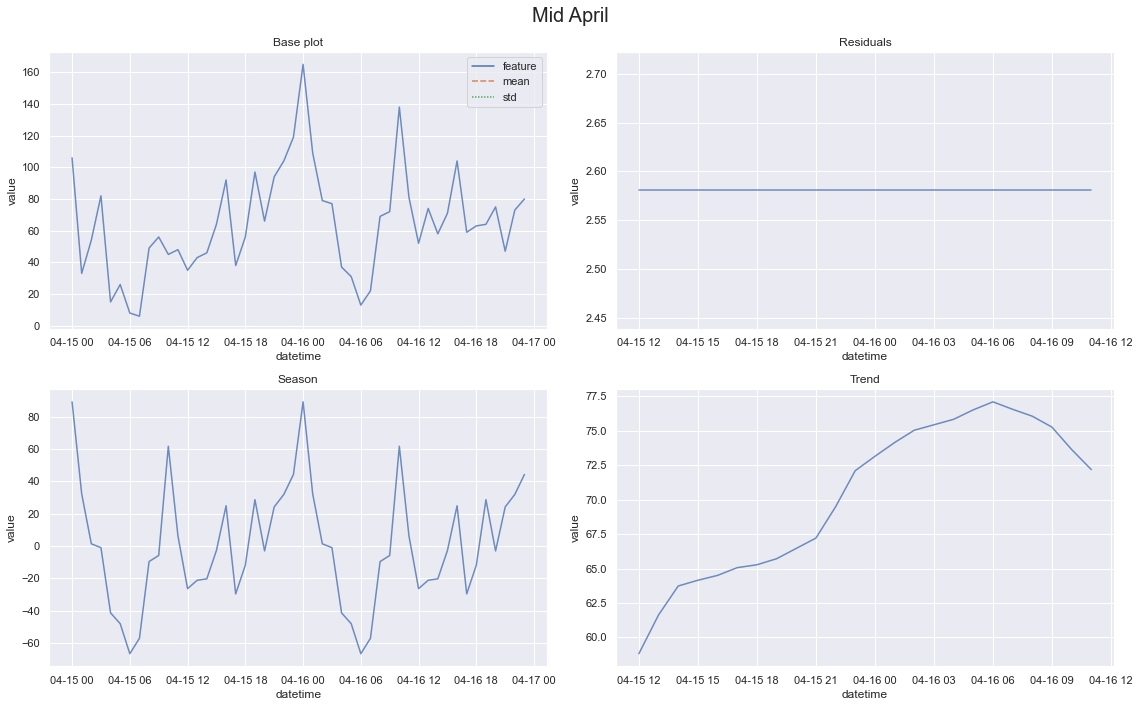

In [54]:
draw_base_plot(df_h['num_orders']['2018-04-15':'2018-04-16'], 100, set_title='Mid April')

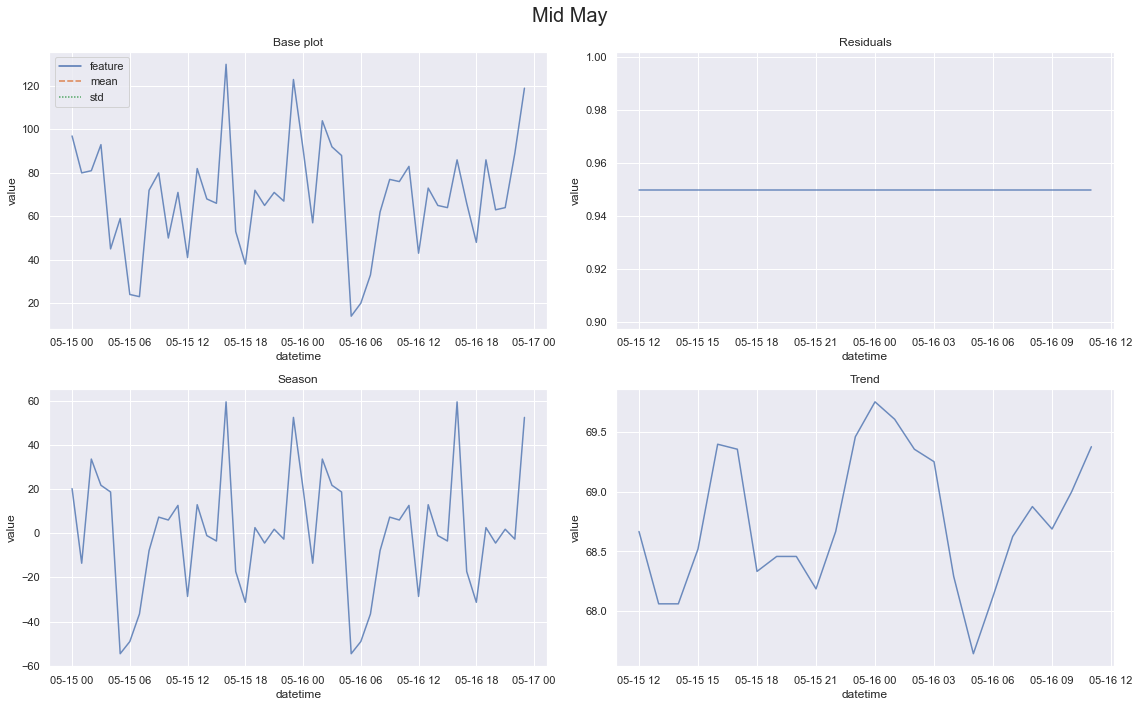

In [55]:
draw_base_plot(df_h['num_orders']['2018-05-15':'2018-05-16'], 100, set_title='Mid May')

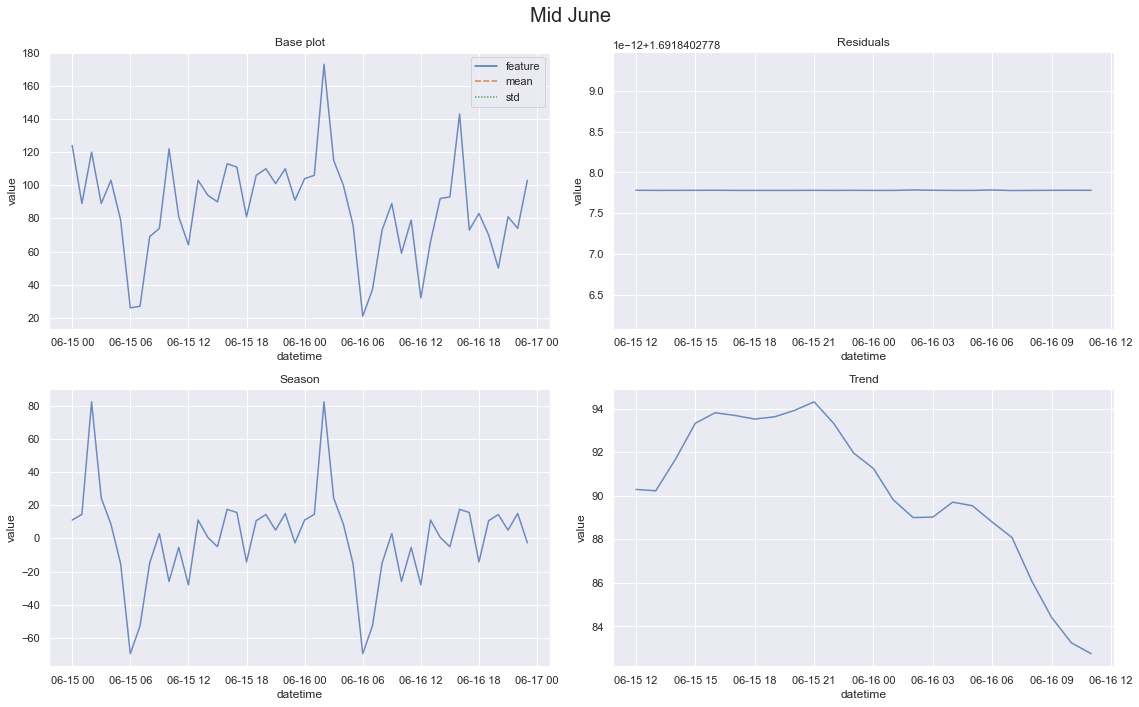

In [56]:
draw_base_plot(df_h['num_orders']['2018-06-15':'2018-06-16'], 100, set_title='Mid June')

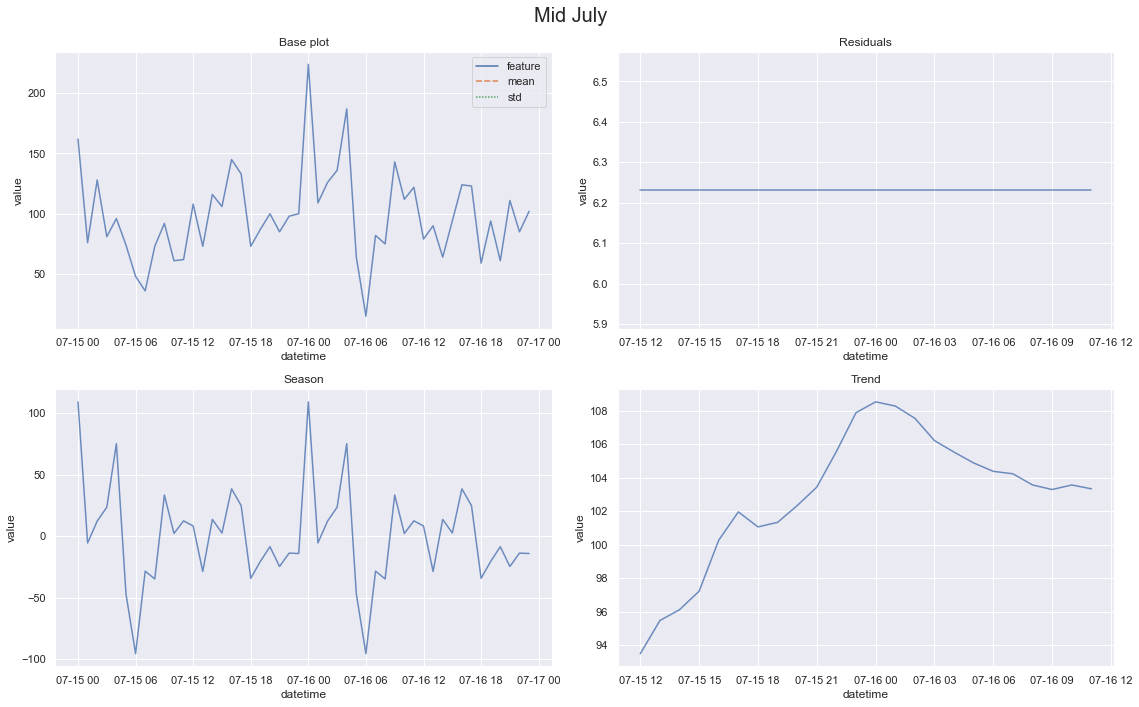

In [57]:
draw_base_plot(df_h['num_orders']['2018-07-15':'2018-07-16'], 100, set_title='Mid July')

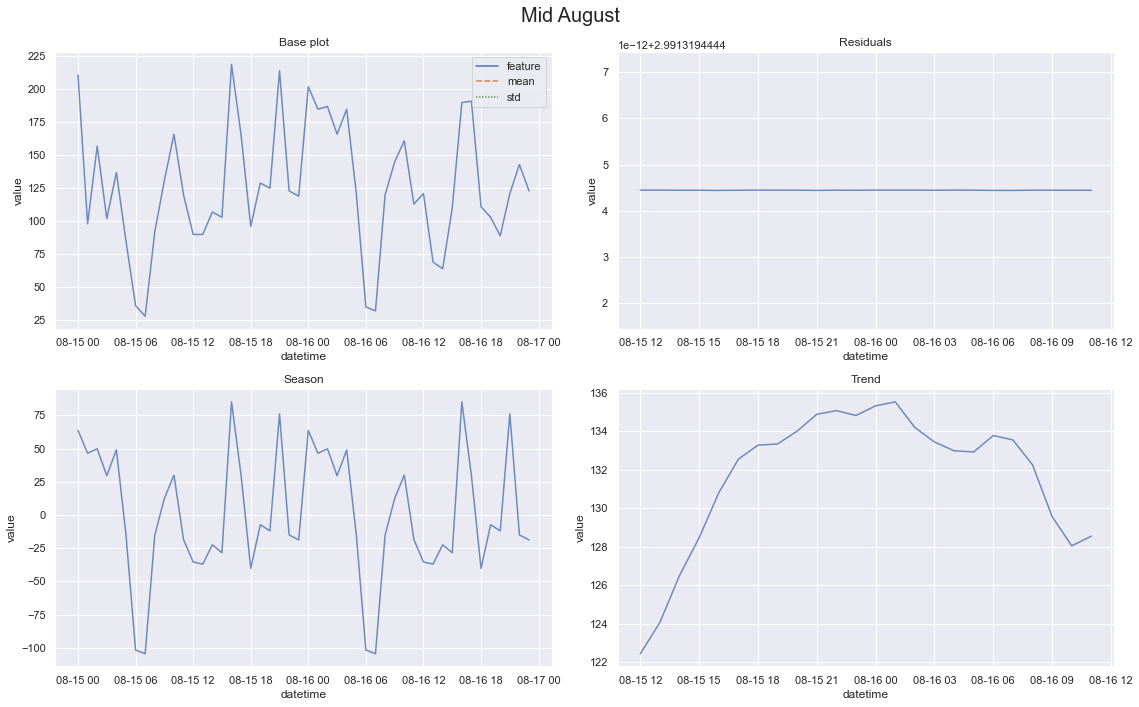

In [58]:
draw_base_plot(df_h['num_orders']['2018-08-15':'2018-08-16'], 100, set_title='Mid August')

### Вывод

Было установлено, что временной ряд нестационарный - среднее значение и отклонение меняются, у разности временного ряда и его предыдущего значения немного меняется только отклонение. Были выделены следующие сезонные закономерности:
- "Сезон" равен одному дню
- Наблюдается рост значений у графиков тренда весна-лето.
- В каждом рассмотренном месяце в 6 часов меньше всего заказов.
- Больше всего заказов в 12 часов ночи, в мае смещается на 11 часов ночи, в июне 2 часа ночи.

## Обучение моделей

### Объявление констант и функций

In [59]:
SEED = 732045
TEST_SIZE = 0.1
TARGET = 'num_orders'

Объявлю несколько функций, которые будут делить датасет на тестовую и тренеровочную выборки, создавать дополнительные признаки для временного ряда и обучать модели. Для каждой модели будет идти поиск оптимальных дополнительных признаков (хранится в словаре `engine_grid`) и гиперпараметров (объявлены для каждой модели в ячейке её обучения), проверка с помощью кросс-валидации. Валидационная и тестовая выборка формируются с учетом особенностей временных рядов - наблюдения не перемешивается и идут после тренеровочной выборки.   
Обученные модели будут хранится в словаре `models`, расшифровка ключей:
- `lin` - линейная регрессия
- `forest` - случайный лес
- `cat` - CatBoost
- `lgb` - LightGBM
- `dummy` - предсказание медианой

In [60]:
def engineer_features(data, date=True, target=TARGET,
                      test_size=TEST_SIZE, lag_size=1, roll_size=1):
    data_en = data.copy()
    
    if date: # set date attributes
        set_date(data_en)
    
    for lag in range(1, lag_size + 1): # add artificial features
        data_en['lag_' + str(lag)] = data_en[target].shift(lag)

    data_en['rolling_mean'] = data_en[target].shift().rolling(roll_size).mean()
    
    if test_size == None:
        return data_en
    
    train, test = train_test_split(data_en,
                                   shuffle=False,
                                   test_size=test_size)
    
    train = train.dropna() # na values of artificial features
    df = {
        'features_train': train.drop(columns=[target]),
        'features_test': test.drop(columns=[target]),
        'target_train': train[target],
        'target_test': test[target]
    }
    
    return df

In [61]:
def set_date(data, attr_index = ['year', 'month', 'day', 'dayofweek', 'hour']):
    for i in attr_index:
        data[i] = getattr(data.index, i)

In [62]:
def teach_time_model(data_orig,
                     regressor=LinearRegression(),
                     target=TARGET, test_size=TEST_SIZE, cv=7,
                     cv_test_match=True,
                     scoring='neg_root_mean_squared_error',
                     engine_grid=None,
                     grid=None,
                     attr_index = ['year', 'month', 'day', 'dayofweek', 'hour'],
                     fit_params=None):
    
    data = data_orig.copy()
    set_date(data)
    
    engine_grid = [{}] if engine_grid == None else ParameterGrid(engine_grid)
    if type(cv) == int:
        cv = TimeSeriesSplit(cv, test_size=(int(data_orig.shape[0]*test_size) if cv_test_match else None))
    grid = {} if grid == None else grid
    fit_params = {} if fit_params == None else fit_params
    
    best_score = np.inf
    best_model = 0
    best_grid = 0
    print('---Starting---')
    print()
    for ind, grid_itt in enumerate(engine_grid):
        print(f'Grid: {grid_itt}, {ind/len(engine_grid):.2%}')
        
        df = engineer_features(data, 
                               date=False,
                               target=target,
                               test_size=test_size,
                               **grid_itt)
        
        model = GridSearchCV(regressor,
                             grid,
                             scoring=scoring,
                             cv=cv,
                             n_jobs=-1)
        
        model.fit(df['features_train'], df['target_train'], **fit_params)
        
        if (abs(model.best_score_) < best_score):
            best_model = model
            best_score = abs(model.best_score_)
            best_grid = grid_itt
    
    print()
    print('---Done---', sep='\n\n')
    
    print('Best valid score:', best_score)
    print('Best estimator:', best_model.best_estimator_)
    print('Best engine grid:', best_grid)
    
    best_model.engine_grid_ = best_grid
    
    return best_model

### Обучение моделей

In [63]:
engine_grid = {
    'lag_size': range(1, 11, 1),
    'roll_size': range(1, 11, 1)
}
models = {}

#### Линейная регрессия

Линейная регрессия показала удовлетворительный результат - значение метрики 31.7.

In [64]:
models['lin'] = teach_time_model(df_h, engine_grid={'lag_size': [10], 'roll_size': [10]})

---Starting---

Grid: {'lag_size': 10, 'roll_size': 10}, 0.00%

---Done---
Best valid score: 31.7033168040059
Best estimator: LinearRegression()
Best engine grid: {'lag_size': 10, 'roll_size': 10}


#### Случайный лес

Значение метрики у случайного леса 24.96, лучше линейной регрессии.

In [65]:
models['forest'] = teach_time_model(df_h, 
                                    regressor=RandomForestRegressor(),
                                    engine_grid={'lag_size': [2], 'roll_size': [9]},
                                    grid={
                                        'random_state': [SEED],
                                        'max_depth': [10],
                                        'n_estimators': [35],
                                        'min_samples_split': [12],
                                        'min_samples_leaf': [6],
                                    })

---Starting---

Grid: {'lag_size': 2, 'roll_size': 9}, 0.00%

---Done---
Best valid score: 24.963229426749713
Best estimator: RandomForestRegressor(max_depth=10, min_samples_leaf=6, min_samples_split=12,
                      n_estimators=35, random_state=732045)
Best engine grid: {'lag_size': 2, 'roll_size': 9}


#### LightGBM

Метрика для LightGBM 24.67, результат лишь немного лучше случайного леса, однако может показать себя лучше при тестировании модели.

In [66]:
models['lgb'] = teach_time_model(df_h, 
                                 regressor=lgb.LGBMRegressor(),
                                 engine_grid={'lag_size': [8], 'roll_size': [9]},
                                 grid={
                                     'random_state': [SEED],
                                     'max_depth': [10],
                                     'num_leaves': [20],
                                     'n_estimators': [100],
                                     'n_jobs': [-1]
                                 })

---Starting---

Grid: {'lag_size': 8, 'roll_size': 9}, 0.00%

---Done---
Best valid score: 24.67240472071
Best estimator: LGBMRegressor(max_depth=10, num_leaves=20, random_state=732045)
Best engine grid: {'lag_size': 8, 'roll_size': 9}


#### CatBoost

Значение метрики чуть хуже чем у случайного леса - 25.32.

In [67]:
# 10 4
models['cat'] = teach_time_model(df_h, 
                                 regressor=CatBoostRegressor(),
                                 engine_grid={'lag_size': [10], 'roll_size': [5]},
                                 grid={
                                        'iterations': [900],
                                        'random_state': [SEED],
                                        'max_depth': [8],
                                        'learning_rate': [0.2]
                                    },
                                fit_params={
                                    'verbose': 450
                                })

---Starting---

Grid: {'lag_size': 10, 'roll_size': 5}, 0.00%
0:	learn: 35.0929394	total: 9.41ms	remaining: 8.46s
450:	learn: 4.2905894	total: 3.62s	remaining: 3.6s
899:	learn: 1.2495845	total: 8.44s	remaining: 0us

---Done---
Best valid score: 25.315839223678903
Best estimator: <catboost.core.CatBoostRegressor object at 0x000002089B098190>
Best engine grid: {'lag_size': 10, 'roll_size': 5}


#### Проверка на адекватность

Эта модель является одной из проверочных для проверки адекватности моделей - всегда предсказывает значение медианы тренеровочного датасета. Дополнительно проверим предсказание предыдущим значением.

In [68]:
models['dummy'] = teach_time_model(df_h,
                                   regressor=DummyRegressor(),
                                   grid = {'strategy' : ['median']})

---Starting---

Grid: {}, 0.00%

---Done---
Best valid score: 42.07532842711803
Best estimator: DummyRegressor(strategy='median')
Best engine grid: {}


In [78]:
print('Предсказание предыдущим значением')
print('RMSE score:', mean_squared_error(df_h[TARGET], (df_h[TARGET].shift(fill_value=0)), squared=False))

Предсказание предыдущим значением
RMSE score: 39.05920058529512


### Вывод

На этом этапе были созданы функции для поиска оптимального набора признаков датасета и гиперпараметров для выбранных моделей, были выбраны и обучены следующие модели:  
- `lin` - линейная регрессия, `RMSE = 31.7`
- `forest` - случайный лес, `RMSE = 24.96`
- `lgb` - CatBoost, `RMSE = 24.67`
- `cat` - LightGBM, `RMSE = 25.32`
- `dummy` - предсказание медианой, `RMSE = 42`  
    - Предсказание предыдущим значением `RMSE = 39`    

Лучшие результаты показала модель `lgb`.

## Тестирование моделей

Выбранная модель также показала лучшие результаты на тестировании, дополнительно проверил остальные модели - все модели прошли проверку на адекватность. Построил линейные графики таргета, предсказаний и разницы для каждой модели.
- `lgb` - `RMSE = 43.62` LightGBM, имеет самые лучшие показатели при обучении и тестировании.

In [89]:
def compare_series(target, pred, ax, roll=24, title='Unknown'):
    pred_ser = pd.Series(pred, index=df_model['target_test'].index, name='predictions')
    sns.lineplot(
        data=pd.concat(
            [
                target.rename('target'),
                pred_ser,
                (target - pred_ser).rename('difference')
            ],
            axis = 1).rolling(roll).mean(),
        ax=ax,
        alpha=0.7
    )
    
    ax.set_title(title)
    ax.set_ylabel('value')
    ax.tick_params(axis='x', rotation=20)

,split_0,split_1,split_2,split_3,split_4,split_5,split_6,valid_score,test_score
lgb,21.944,22.536,23.863,22.955,23.499,25.980,31.929,24.672,43.623
cat,22.568,23.311,24.508,23.856,23.929,26.389,32.650,25.316,44.642
forest,22.372,21.835,24.003,22.700,24.085,27.329,32.420,24.963,46.185
lin,27.656,28.177,30.334,29.756,30.751,34.893,40.356,31.703,53.455
previous,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,58.856
dummy,32.822,34.372,41.108,37.640,40.614,48.289,59.682,42.075,87.153


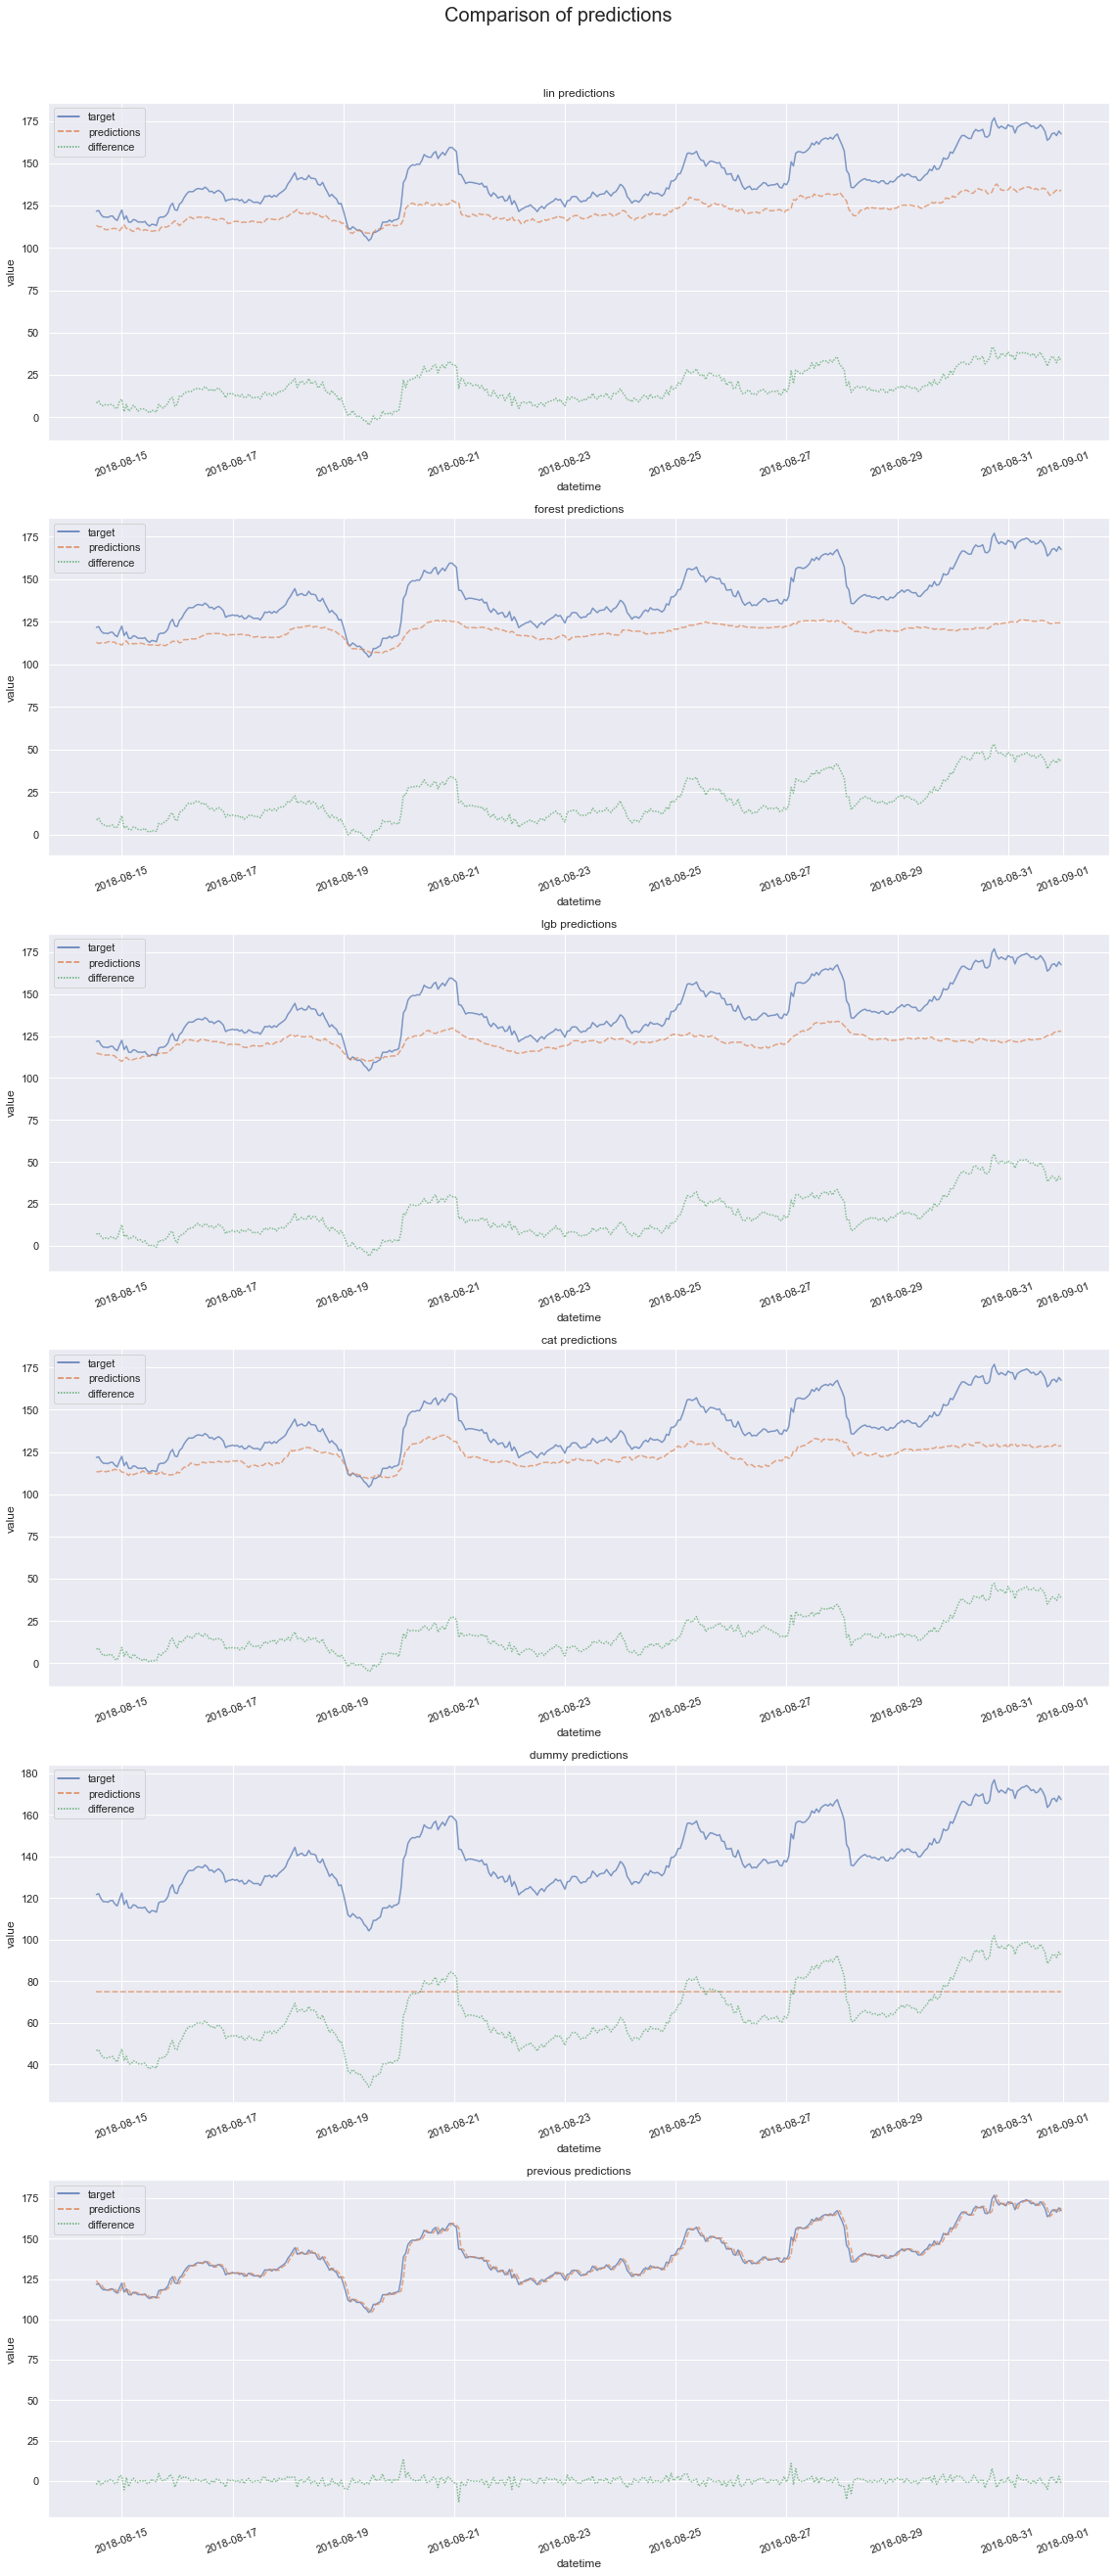

In [90]:
models_score = []
idx = []
fig, ax = plt.subplots(len(models.keys()) + 1, 1, figsize=(16, 6*(len(models.keys()) + 1)))
row = -1

#models
for key, model in models.items():
    row += 1
    grid = model.engine_grid_
    
    cv_keys = pd.Series(model.cv_results_.keys())
    cv_keys = cv_keys[cv_keys.str.contains(r'split\d')].values
    dict_score = {}
    fit_params = {}
    df_model = engineer_features(df_h, date=True, **grid)
    
    for ind, j in enumerate(cv_keys):
        dict_score['split_' + str(ind)] = round(abs(model.cv_results_[j][0]), 3)
    dict_score['valid_score'] = round(abs(model.best_score_), 3)
    
    pred = model.predict(df_model['features_test'])
    compare_series(df_model['target_test'], pred, ax=ax[row], title=key + ' predictions')
    
    dict_score['test_score'] = round(mean_squared_error(df_model['target_test'],
                                                        pred,
                                                        squared=False), 3)
    
    models_score.append(dict_score)
    idx.append(key)

#previous value
dict_score = {}
key = 'previous'
pred = df_model['target_test'].shift(fill_value=df_model['target_train'].iloc[-1])
dict_score['test_score'] = round(mean_squared_error(df_model['target_test'], pred, squared=False), 3)  
compare_series(df_model['target_test'], pred, ax=ax[-1], title=key + ' predictions')
models_score.append(dict_score)
idx.append(key)

fig.suptitle('Comparison of predictions', fontsize=20, y=1.015)
plt.tight_layout()
result = pd.DataFrame(models_score, index = idx).fillna(-1).sort_values(by=['test_score'])
result

## Общий вывод

Целью этого исследования выступало построение модели машинного обучения, которая будет прогнозировать количество заказов такси на следующий час, чтобы привлекать больше водителей в период пиковой нагрузки. Условия:
- Целевой признак - количество заказов.
- Метрикой выступает `RMSE`, её значение не должно быть ниже 48.
- Размер тестовой выборки - 10% от всего датасета.
- Данные должны быть ремемлированы по одному часу.  

Исходный датасет был обработан и ресамплирован с интервалом в один час. Было установлено, что временной ряд нестационарный - среднее значение и отклонение меняются, у разности временного ряда и его предыдущего значения немного меняется только отклонение. Были выделены следующие сезонные закономерности:
- "Сезон" равен одному дню
- Наблюдается рост значений у графиков тренда весна-лето.
- В каждом рассмотренном месяце в 6 часов меньше всего заказов.
- Больше всего заказов в 12 часов ночи, в мае смещается на 11 часов ночи, в июне 2 часа ночи.

Были созданы функции для поиска оптимального набора признаков датасета и гиперпараметров для выбранных моделей, обучены следующие модели (с их значениями метрики с использованием кросс-валидации):  
На этом этапе были созданы функции для поиска оптимального набора признаков датасета и гиперпараметров для выбранных моделей, были выбраны и обучены следующие модели:  
- `lin` - линейная регрессия, `RMSE = 31.7`
- `forest` - случайный лес, `RMSE = 24.96`
- `lgb` - CatBoost, `RMSE = 24.67`
- `cat` - LightGBM, `RMSE = 25.32`
- `dummy` - предсказание медианой, `RMSE = 42`  
    - Предсказание предыдущим значением `RMSE = 39`    


Была отобрана и прошла тестирование следующая модель:
- `lgb` - LightGBM, имеет самые лучшие показатели при обучении и проверке на тестовой выборке: `RMSE = 43.62`.